In [ ]:
!pip install opencv-python-headless

import cv2
import numpy as np
import string
import os
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
#ASCII CONVERSION
d={chr(i):i for i in range(255)}  #character to ascii
c={i:chr(i) for i in range(255)}  #ascii to charater

In [ ]:
from google.colab import files
uploaded = files.upload()  # Choose your image file here

Saving pexels-kaip-594137.jpg to pexels-kaip-594137.jpg


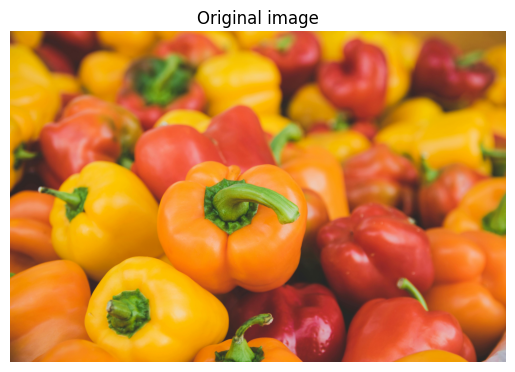

In [ ]:
# Get the filename of the uploaded file
# Assuming only one file was uploaded
uploaded_filename = list(uploaded.keys())[0]

# Read the image data from the uploaded file content
# uploaded[uploaded_filename] contains the byte content of the file
img_array = np.frombuffer(uploaded[uploaded_filename], np.uint8)

# Decode the image data using cv2.imdecode
x = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

# Check if the image was loaded successfully
if x is None:
    print(f"Error: Could not load image from {uploaded_filename}. Make sure it's a valid image file.")
else:
    # Convert BGR to RGB
    xrgb = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(xrgb)
    plt.title('Original image')
    plt.axis('off')
    plt.show()

In [ ]:
x

array([[[ 23,  88, 139],
        [ 24,  89, 140],
        [ 26,  92, 143],
        ...,
        [ 28,  92, 140],
        [ 31,  95, 143],
        [ 33,  97, 145]],

       [[ 23,  88, 139],
        [ 24,  89, 140],
        [ 26,  92, 143],
        ...,
        [ 30,  94, 142],
        [ 31,  95, 143],
        [ 32,  96, 144]],

       [[ 24,  89, 140],
        [ 25,  90, 141],
        [ 26,  91, 142],
        ...,
        [ 32,  96, 144],
        [ 32,  96, 144],
        [ 32,  96, 144]],

       ...,

       [[ 36,  63, 107],
        [ 36,  63, 107],
        [ 36,  63, 107],
        ...,
        [185, 173, 173],
        [185, 173, 173],
        [185, 173, 173]],

       [[ 35,  62, 106],
        [ 35,  62, 106],
        [ 36,  63, 107],
        ...,
        [185, 173, 173],
        [185, 173, 173],
        [185, 173, 173]],

       [[ 35,  62, 106],
        [ 35,  62, 106],
        [ 36,  63, 107],
        ...,
        [185, 173, 173],
        [185, 173, 173],
        [185, 173, 173]]

In [ ]:
x.shape

(4000, 6000, 3)

In [ ]:
key="123anj"
text="secret"

In [ ]:
key

'123anj'

In [ ]:
#ASCII VALUES
text_ascii=[d[ch] for ch in text]
key_ascii=[d[ch] for ch in key]
print(text_ascii)
print(key_ascii)

[115, 101, 99, 114, 101, 116]
[49, 50, 51, 97, 110, 106]


In [ ]:
#encrypt using pixel modification
x_enc=x.copy()
n,m,z=0,0,0
l=len(text)
kl=0
for i in range(l):
    orig_val=x_enc[n,m,z]
    new_val=d[text[i]]^d[key[kl]]
    x_enc[n,m,z]=new_val
    print(f"Embedding '{text[i]}' (ASCII {d[text[i]]}) XOR '{key[kl]}' (ASCII {d[key[kl]]}) = {new_val} at pixel ({n},{m}, {z}) [original={orig_val}]")
    n=n+1
    m=m+1
    m=(m+1)%3
    kl=(kl+1)%len(key)

Embedding 's' (ASCII 115) XOR '1' (ASCII 49) = 66 at pixel (0,0, 0) [original=23]
Embedding 'e' (ASCII 101) XOR '2' (ASCII 50) = 87 at pixel (1,2, 0) [original=26]
Embedding 'c' (ASCII 99) XOR '3' (ASCII 51) = 80 at pixel (2,1, 0) [original=25]
Embedding 'r' (ASCII 114) XOR 'a' (ASCII 97) = 19 at pixel (3,0, 0) [original=24]
Embedding 'e' (ASCII 101) XOR 'n' (ASCII 110) = 11 at pixel (4,2, 0) [original=25]
Embedding 't' (ASCII 116) XOR 'j' (ASCII 106) = 30 at pixel (5,1, 0) [original=28]


In [ ]:
cv2.imwrite("encrypt.jpg",x_enc)

True

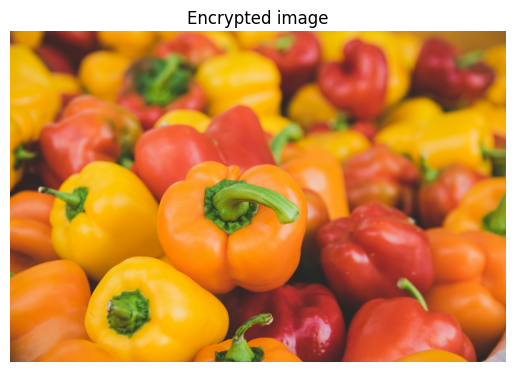

In [ ]:
plt.imshow(cv2.cvtColor(x_enc,cv2.COLOR_BGR2RGB))
plt.title('Encrypted image')
plt.axis('off')
plt.show()

In [ ]:
#decrypt
n, m, z = 0, 0, 0
kl = 0
decrypt = ""
for i in range(l):
    val = x_enc[n, m, z]
    orig_char = c[val ^ d[key[kl]]]
    decrypt = decrypt + orig_char
    print(f"Decrypting pixel ({n},{m},{z}): {val} XOR {d[key[kl]]} = {val ^ d[key[kl]]} -> '{orig_char}'")
    n = n + 1
    m = m + 1
    m = (m + 1) % 3
    kl = (kl + 1) % len(key)
print(decrypt)

Decrypting pixel (0,0,0): 66 XOR 49 = 115 -> 's'
Decrypting pixel (1,2,0): 87 XOR 50 = 101 -> 'e'
Decrypting pixel (2,1,0): 80 XOR 51 = 99 -> 'c'
Decrypting pixel (3,0,0): 19 XOR 97 = 114 -> 'r'
Decrypting pixel (4,2,0): 11 XOR 110 = 101 -> 'e'
Decrypting pixel (5,1,0): 30 XOR 106 = 116 -> 't'
secret
